In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Reading dataframe

In [2]:
df = pd.read_csv("tweet_data.csv")

* Viewing tweets present in our dataset

In [3]:
df.sample(10)

,textID,tweet_text,sentiment
13911,1751430325,is thrilled prom went well,positive
9834,1694107752,got 1 after school detention. 2 lunch times an...,negative
17484,1753482227,@worldarts I see we are approaching a nice rou...,positive
2800,1961079740,@zzwhitejd did you decide it is a sprain? mine...,negative
8902,1966084392,Rachel Alexandra not in Belmont but appearin...,positive
15746,1752700733,@TMZaol We should have a twitter reunion it wo...,positive
8789,1966000466,@BrittneyCash Shame about your job have you t...,negative
4330,1962410227,Hey #socialmediatv ugh no way to do video&gt;b...,negative
8462,1965824564,@igotyourcrazy waaaaayyyyy too hot for that,negative
17854,1753600508,Is gonna go for a shower goin to see hannah M...,positive


* Checking total number of tweets

In [4]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


* Printing a tweet and sentiment based on a tweet ID

In [5]:
tweet_id =4879
tweet = df.iloc[tweet_id]

In [6]:
print("Tweet:{}".format(tweet["tweet_text"]))
print("Tweet sentiment:{}".format(tweet["sentiment"]))

Tweet:Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment:negative


* Using piechart to show how tweets are distributed over the dataset

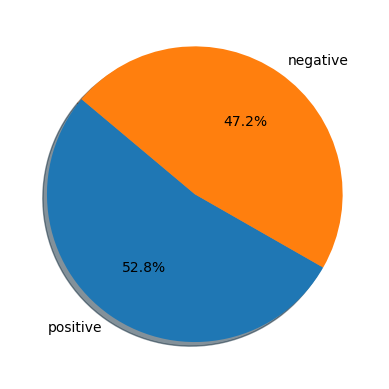

In [7]:
import matplotlib.pyplot as plt
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [8]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


* Display the most often positive words in the tweets

In [9]:
from wordcloud.wordcloud import WordCloud

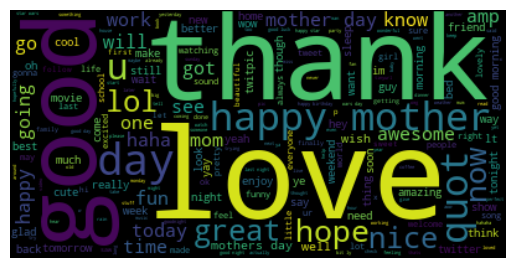

In [10]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() 
               for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* Display the most often negative words in the tweets

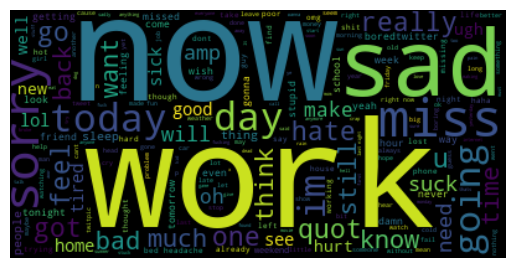

In [11]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* Text Normalization (Reducing randomness in a particular piece of text)
To achieve this we will use REGEX

In [12]:
import re

* Example of a twitter's random tweet

In [13]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

* Handling Retweet Tag
Replacing the occurences of RT(Retweets) with a default value

In [14]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

In [15]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


* Handling User Tag Replacing @_Someone_ with a default user tag

In [16]:
def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

In [17]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


* Emojis Replacing emojis with meaningful text

In [18]:
import emoji

In [19]:
def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [20]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


* Handling URL Replacing the occurences of http:// or https:// with a default value

In [21]:
def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

In [22]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


* Handling Hashtags Replacing occurence of #_something_ with a default value

In [23]:
def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

In [24]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


## TEXT CLEANING

Removing or replacing all the items that do not provide additional information

* considering other features that are not really Twitter-dependant

In [25]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

* Removing upper capitilization
lower case each letter in a specific tweet

In [26]:
def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [27]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


## Word Repetition

* Replacing word repetition with a single occurence("oooooooo" becomes "oo")

In [28]:
def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+',r'\1\1', tweet)
    return tweet

In [29]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


## Punctuation Repetition

* Replacing punctuation repetition with a single occurence("!!!!!" becomes "!")

In [30]:
def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

In [31]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!



## Word Contraction

In [32]:
import contractions


* Use contractions_dict to list most common contractions

In [33]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "


* Create a _fix_contractions  function used to replace contractions with their extended forms by using the contractions dictionary

In [34]:
def _fix_contractions(tweet):
    for k, v in contractions.contractions_dict.items():
        tweet = tweet.replace(k, v)
        return tweet

In [35]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I'd like it so much!


* Create a _fix_contractions function used to replace contractions with their extended forms by using the contractions packages

In [36]:
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

In [37]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!




## TOKENIZATION

The way to separate text into smaller chunks that can be used by computers to learn

Tokenization exceptions

Punctuations- hello!!!!!!!! - !!!!!!

Stop words - I am happy - I am

Numbers - I won $50,  so  nice   -  $50
          
          Almost won $1M,  so angry  - $1M

* Install NLTK package

In [38]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


## Easy Tokenization

* -Import NLTK

* -Import the word_tokenize module from NLTK

* -Download the punkt tokenizer model from NLTK

In [39]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* simple tweet to be tokenized

In [40]:
tweet = "These are 5 different words!"

* Create a tokenize() function that takes a tweet as input and returns a list of tokens

In [41]:
def tokenize(tweet):
    tokens = word_tokenize(tweet)
    return tokens

* Use the tokenize() function to print the tokenized version of a tweet

In [42]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


## Custom Tokenization

* Import the string package

In [43]:
import string

* Retrieve English punctuation signs by using the string package

In [44]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the stopwords module from NLTK

* Download stopwords data from NLTK

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Create a set of English stopwords

In [46]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'haven', 'you', 'ours', 'her', 'than', "wasn't", 'is', 'too', 'the', 'shouldn', 'of', 'at', 'his', 'or', 'above', 'them', 'between', 'couldn', 'against', 'for', "isn't", 'ma', 'whom', 'who', 'myself', 'wouldn', "it's", 'each', "aren't", 'down', 'won', 'should', 'nor', 'no', 'been', 'more', 'theirs', 'having', 'll', 'from', 'itself', 'as', 'few', 'so', 'had', 'y', "that'll", 'doesn', 'when', 'while', "doesn't", 'hasn', 'up', 'ourselves', 'any', 'hers', 'did', "hasn't", 'are', 'can', 'shan', 'which', 'd', 'me', 'there', 'was', 'only', "didn't", 'below', 'himself', 'until', 'we', 'their', 'but', 'she', 'if', 'during', 'ain', "haven't", 'am', 'with', "won't", "mightn't", 'yourself', 'isn', 'through', 'just', "you'd", 'same', 'this', 'weren', 'your', 'themselves', 'here', 'such', 'that', 'needn', 'does', 'now', 'to', "needn't", 'further', "wouldn't", 'all', 'not', 'these', "couldn't", 'they', 'don', "mustn't", 'own', 'over', 'where', 'hadn', "you'll", 'aren', 'because', 'being', "you're", 

* Removing some stopwords from the set

In [47]:
stop_words.discard('not')
print(stop_words)

{'haven', 'you', 'ours', 'her', 'than', "wasn't", 'is', 'too', 'the', 'shouldn', 'of', 'at', 'his', 'or', 'above', 'them', 'between', 'couldn', 'against', 'for', "isn't", 'ma', 'whom', 'who', 'myself', 'wouldn', "it's", 'each', "aren't", 'down', 'won', 'should', 'nor', 'no', 'been', 'more', 'theirs', 'having', 'll', 'from', 'itself', 'as', 'few', 'so', 'had', 'y', "that'll", 'doesn', 'when', 'while', "doesn't", 'hasn', 'up', 'ourselves', 'any', 'hers', 'did', "hasn't", 'are', 'can', 'shan', 'which', 'd', 'me', 'there', 'was', 'only', "didn't", 'below', 'himself', 'until', 'we', 'their', 'but', 'she', 'if', 'during', 'ain', "haven't", 'am', 'with', "won't", "mightn't", 'yourself', 'isn', 'through', 'just', "you'd", 'same', 'this', 'weren', 'your', 'themselves', 'here', 'such', 'that', 'needn', 'does', 'now', 'to', "needn't", 'further', "wouldn't", 'all', 'these', "couldn't", 'they', 'don', "mustn't", 'own', 'over', 'where', 'hadn', "you'll", 'aren', 'because', 'being', "you're", 'then',

* Creating a custom_tokenize function

In [48]:
def custom_tokenize(tweet,
                   keep_punct = False,
                   keep_alnum = False,
                   keep_stop = False):
    
    token_list = word_tokenize(tweet)
    
    if not keep_punct:
        token_list = [token for token in token_list
                      if token not in string.punctuation]
        
    if not keep_alnum:
        token_list = [token for token in token_list if token.isalpha()]
        
    if not keep_stop:
        stop_words = set(stopwords.words('english'))
        stop_words.discard('not')
        token_list = [token for token in token_list if not token in stop_words]
    return token_list

* Testing the function with a particular tweet

In [49]:
tweet = "these are 5 different words!"

In [50]:
print("Tweet tokens: {}".format(custom_tokenize(tweet,
                                                keep_punct=True,
                                                keep_alnum=True,
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


## Stemming

Stemming is the process of reducing words to their root form. Stemming follows a Rule-based approach (It is an algorith which decides which part of words are cut off). It is faster but it chops words, meaning is less important.

Over stemming- when too much of words are chopped off- universal university universe

Under stemming- when words are not chopped off enough- alumnus alumni alumnae

* Import different libraries and modules used for stemming

In [51]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [52]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [53]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')

* Create a stem_tokens function that takes the list of tokens as input and returns a list of stemmed tokens

In [54]:
def stem_tokens(tokens, stemmer):
    token_list = []
    for token in tokens:
        token_list.append(stemmer.stem(token))
    return token_list

* Print the different results and compare the stemmed tokens

In [55]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [56]:
tokens = ["international", "companies", "had", "interns"]

In [57]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


## Lemmatization

Lemmatization serves the same purpose as stemming but makes use of word context. Lemmatization follows Dictionary-based approach(it will always return words found in the dictionary). Lemmatization uses context to determine their shortest but existing dictionary forms. Lemmatization is slower than stemming but it uses context. Meaning is important too.

* Import different libraries and modules used for lemmatization

In [58]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [59]:
tokens = ["international", "companies", "had", "interns"]

## Part of Speech (POS) Tagging

In [60]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [61]:
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
            }

* Create the lemmatizer by using the WordNet module

In [62]:
lemmatizer = WordNetLemmatizer()

* Create a lemmatize_tokens function that takes the list of tokens as input and returns a list of lemmatized tokens

In [63]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
    token_list = []
    for token in tokens:
        token_list.append(lemmatizer.lemmatize(token, word_type[token]))
    return token_list

In [64]:
print("Tweet lemma: {}".format(lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


## TWEET PRE_PROCESSOR

Putting it al together

* Long and complex tweet to be processed

In [65]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom process_tweet function that can be used to process tweets end-to-end

* Note that this functon will be used as a base for the following sections

In [66]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

* Test your process_tweet function!

In [67]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


* Note: it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [68]:
import random

In [69]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: just slammed my finger in a car dor  FML ow
Post Twitter processing tweet: just slammed my finger in a car dor  FML ow
Post Word processing tweet: just slammed my finger in a car dor  fml ow
['slam', 'finger', 'car', 'dor', 'fml', 'ow']


Initial tweet: @tommcfly i am glad cos u wouldnt lose me as a fan anyway  i get to see you guys on saturday evening at leicester  it better be good!
Post Twitter processing tweet:  i am glad cos u wouldnt lose me as a fan anyway  i get to see you guys on saturday evening at leicester  it better be good!
Post Word processing tweet:  i am glad cos you would not lose me as a fan anyway  i get to see you guys on saturday evening at leicester  it better be good!
['glad', 'cos', 'would', 'not', 'lose', 'fan', 'anyway', 'get', 'see', 'guy', 'saturday', 'even', 'leicest', 'better', 'good']


Initial tweet: @MandyPandy32  awww for me I just think she's tooo young or just not ready for it - tis painful to watch her so upset
Post Twitter processin

## VECTORIZATION

## REPRESENTING TEXT

Representing text numerically allows it to be understood by ML models

Lets consider Three methods to represent Text 

Positive/Negative Frequencies

Bag of Words 

TF-IDF

Processing Tweets

Install the Scikit-Learn package which is versy useful for a lot of different Ml tasks.



In [70]:
#pip install -U scikit-learn

* Apply process_tweet function created in section 2 to the entire DataFrame

* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment


In [71]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                             if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


* Convert DataFrame to two lists: one for tweet tokens (x) and one for the tweet sentiment (y)

In [72]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [73]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

## Positive/Negative Frequency

* Corpus of tweet tokens used for the first method

In [74]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [75]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

* Build the frequency dictionnary on the corpus by using the function

In [76]:
freqs = build_freqs(corpus, sentiment)

In [77]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* Build the frequency dictionnary on the entire dataset by using the function

In [78]:
freqs_all = build_freqs(X, y)

In [79]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1358
Frequency of word 'love' in - tweets: 67


* Create a tweet_to_freqs function used to convert tweets to a 2-d array by using the frequency dictionnary

In [80]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

* Print the 2-d vector by using the tweet_to_freqs function and the corpus dictionnary

In [81]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


* Print the 2-d vector by using the tweet_to_freqs function and the dataset dictionnary

In [82]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[1358.   67.]


* Plot word vectors in a chart and see where they locate

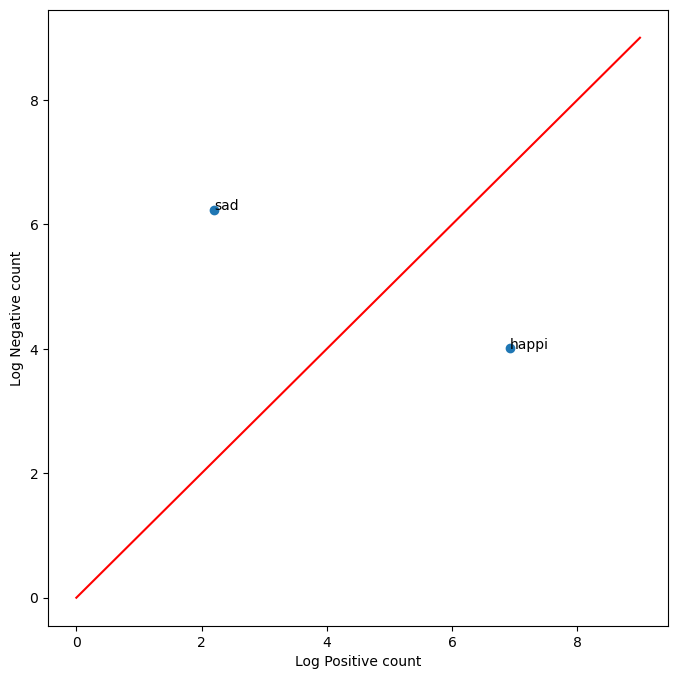

In [83]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

## **3.3** Bag of Word

* Corpus of tweet tokens used for the second method

In [84]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import countVectorizer from the Scikit-learn library

In [85]:
#pip install sklearn

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a fit_cv function used to build the Bag-of-words vectorizer with the corpus

In [87]:
def fit_cv(tweet_corpus):
    cv_vect = CountVectorizer(tokenizer=lambda x: x,
                             preprocessor=lambda x: x)
    cv_vect.fit(tweet_corpus)
    return cv_vect

* Use the fit_cv function to fit the vectorizer on the corpus

In [88]:
cv_vect = fit_cv(corpus)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Get the vectorizer features (matrix columns)

In [89]:
ft = cv_vect.get_feature_names_out()

In [90]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Convert the corpus to a matrix by using the vectorize

In [91]:
cv_mtx = cv_vect.transform(corpus)

* Print the matrix shape

In [92]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


* Convert the matrix to an array

In [93]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

* Transform a new tweet by using the vectorizer

In [94]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]], dtype=int64)

In [95]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## Term Frequency - Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

In [96]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import IfidfVectorizer from the scikit-learn Library

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a fit_tfidf function used to build the TF-IDF vectorizer with the corpus

In [98]:
def fit_tfidf(tweet_corpus):
    tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                             tokenizer=lambda x: x)
    tf_vect.fit(tweet_corpus)
    return tf_vect

* Use the fit_cv function to fit the vectorizer on the corpus, and transform the corpus

In [99]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

* Get the vectorizer features (matrix columns)

In [100]:
tf = tf_vect.get_feature_names_out()

In [101]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Print the matrix shape

In [102]:
print(tf_mtx.shape)

(6, 13)


* Convert the matrix to an array

In [103]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

* Transform a new tweet by using the vectorizer

In [104]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

## SENTIMENT MODEL

Logistic Regression - Use of logistic function to model a binary dependant variable. delta t = 1/ 1+ exponential -t. Result above 50% Positive prediction, result below 50% negative

* Helper function
This function is used to plot the confusion matrix for the different models to be created

In [105]:
import seaborn as sn

def plot_confusion(cm):
    plt.figure(figsize = (5,5))
    sn.heatmap(cm, annot=True, cmap="Blues", fmt='0f')
    plt.xlabel("prediction")
    plt.ylabel("True value")
    plt.title("Confusion Matix")
    return sn

## Train/Test Split

* Check what x and y looks like

In [106]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

* Import the train_test_split function from the Scikit-Learn package 

In [107]:
from sklearn.model_selection import train_test_split

* Use the train_test_split function to split arrays of X and y into training and testing variables

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0,
                                                   train_size=0.80)

* Print the size of these new variables

In [109]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


* Print random tweets, just to verify everything goes as expected

In [110]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['tell', 'mommi', 'said', 'n', 'love', 'mucho', 'mucho']
Sentiment: 1


## Model

* Import the LogisticRegression model from Scikit-Learn

In [111]:
from sklearn.linear_model import LogisticRegression

* Create s fit_lr function used to fit a Logistic Regression model on X and y training data

In [112]:
def fit_lr(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

## POS/Neg Frequency

* Use the build_freqs function on training data to create a frequency dictionary

* use the frequency dictionary together with the tweet_to_freq function to convert X_train and X_test data to 2-d vectors

In [113]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [114]:
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00264615 -0.00194929]] [-0.55956082]


## Count Vector

* Use the fit_cv function on training data to build the Bag-of-Words vectorizer Transform X_train and X_test data by using the vectorizer



In [115]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Fit the Logistic Regression model on training data by using the fit_lr function

In [116]:
model_lr_cv = fit_lr(X_train_cv, y_train)

## TF-IDF

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [117]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Fit the Logistic Regression model on training data by using the fit_lr function

In [118]:
model_lr_tf = fit_lr(X_train_tf, y_train)

## Performance Metrics

* Import the accuracy score and confusion matrix from Scikit-Learn

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

* Use the fitted model_lr_pn (positive/negative frequencies) to predict X_test

In [120]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

* Print the model accuracy by comparing predictions and real sentiments

print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

* Plot the confusion matrix by using plot_confusion helper function

<module 'seaborn' from 'C:\\Users\\Administrator\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

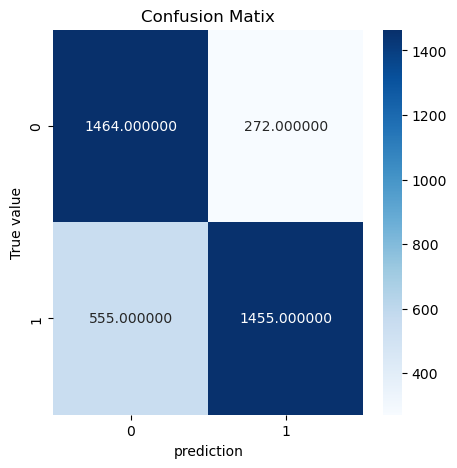

In [121]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

## Count Vector

* Use the fitted model_lr_cv (Bag-of-words) to predict X_test

In [122]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

* Print the model accuracy by vomparing predictions and real sentiments

In [123]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.52%


* Plot the confusion matrix by using the plot_confusion helper function

<module 'seaborn' from 'C:\\Users\\Administrator\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

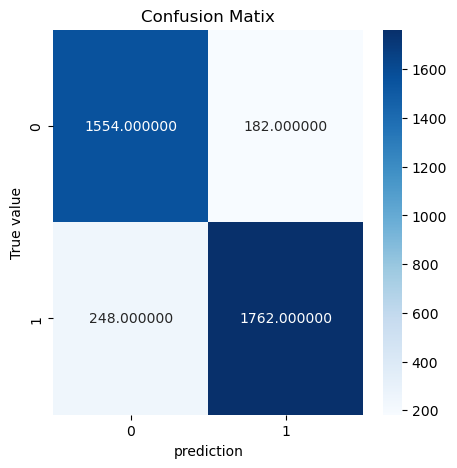

In [124]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

## TF-IDF

* Use the fitted model_lr_tf (TF-IDF) to predict X_test

In [125]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* print the model accuracy by comparing predictions and real sentiments

In [126]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.65%


* Plot the confusion matrix by using the plot_confusion helper function

<module 'seaborn' from 'C:\\Users\\Administrator\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

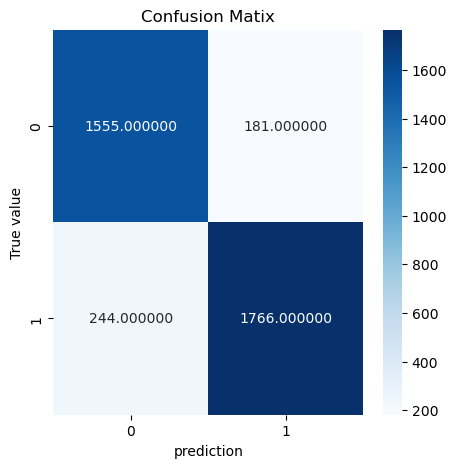

In [127]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

* Conclusion

Bag-of-words and TF-IDF seems to be more accurate than Positive and negative Frequencies, again these are not the only or best method but it seems efficiently accurate for the type of application we want to develope.

## Mini-Pipeline

* Final tweet used to check if the model works as well as we expected


In [128]:
my_tweet ="""ZEUZ @TIMbi: we have come to the end of our sentiment analysis for social media using NLP content!
And don't forget to try out other methods visit https://cqu.edu.cn ..."""

* Create a predict_tweet function used to pre-process, transform and predict tweet sentiment

In [129]:
def predict_tweet(tweet):
    processed_tweet = process_tweet(tweet)
    transformed_tweet = tf.transform([processed_tweet])
    prediction = model_lr_tf.predict(transformed_tweet)
    
    if prediction == 1:
        return "Prediction is a positive sentiment"
    else:
        return "Prediction is a negative sentiment"

* Predict my tweet sentiment by using the predict_tweet function!

In [130]:
predict_tweet(my_tweet)

'Prediction is a negative sentiment'